In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import os
print(os.environ['CUDA_VISIBLE_DEVICES'])
os.environ['CUDA_VISIBLE_DEVICES']='0'

0


In [3]:
from plb.cut.sample_utils import init_env


env, state = init_env()

[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-t65m17dx
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.7.11
[I 09/22/21 21:14:38.904 2089465] [shell.py:_shell_pop_print@35] Graphical python shell detected, using wrapped sys.stdout
[Taichi] Starting on arch=cuda
[Tina] version 0.1.1
[Tina] Taichi properties hacked
pimirives: num primitive: 2
Building primitive
action:
  dim: 3
  scale: (0.015, 0.015, 0.015)
collision_group: [0.0, 0.0, 0.0]
color: (0.8, 0.8, 0.8)
friction: 0.0
h: (0.125, 0.125)
init_pos: (0.5, 0.3, 0.5)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
prot: (1.0, 0.0, 0.0, 0.58)
shape: Knife
size: (0.04, 0.2, 0.2)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 0
  scale: ()
collision_group: [0.0, 0.0, 0.0]
color: (0.3, 0.3, 0.3)
friction: 0.9
h: (0.125, 0.125)
init_pos: (0.3, 0.3, 0.3)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
prot: (1.0, 0.0, 0.0, 0.58)
shape: 
upper_b

In [4]:
state['softness'] = 666.

In [5]:
from plb.cut.sample_utils import cut
from plb.cut.sample_utils import animate
env.set_state(**state)
images = list(cut(env, state, 0, filename='array', slide=True))
animate(images, 'xx.webm')

[W 09/22/21 21:15:24.028 2089465] [type_check.cpp:visit@70] [$117680] Atomic add (i32 to f32) may lose precision, at
[W 09/22/21 21:15:24.028 2089465] [type_check.cpp:visit@71] 

animating xx.webm
Moviepy - Building video xx.webm.
Moviepy - Writing video xx.webm



Moviepy - Done !
Moviepy - video ready xx.webm


In [6]:
state2 = env.get_state()

In [7]:
from plb.cut.solve_utils import move_gripper_to
env.primitives[1].friction[None] = 10.
env.set_state(state2)
images += list(move_gripper_to(env, np.array([0.425, 0.1, 0.5] + [1, 0, 0, 0] +[0.2]), filename='array'))

images += list(move_gripper_to(env, np.array([0.425, 0.1, 0.5] + [1, 0, 0, 0] +[0.08]), filename='array'))

images += list(move_gripper_to(env, np.array([0.425, 0.12, 0.3] + [1, 0, 0, 0] +[0.08]), filename='array'))

images += list(move_gripper_to(env, list([0.425, 0.3, 0.3]) + [1, 0, 0, 0, 0.2], filename='array'))

images += list(move_gripper_to(env, list([0.65, 0.3, 0.3]) + [1, 0, 0, 0, 0.2], filename='array'))

images += list(move_gripper_to(env, list([0.65, 0.1, 0.5]) + [1, 0, 0, 0, 0.2], filename='array'))

images += list(move_gripper_to(env, list([0.65, 0.11, 0.3]) + [1, 0, 0, 0, 0.08], filename='array'))


In [8]:
animate(images, 'xx.webm')

animating xx.webm
Moviepy - Building video xx.webm.
Moviepy - Writing video xx.webm



Moviepy - Done !
Moviepy - video ready xx.webm


In [9]:
from plb.cut.sample_utils import move_cluster, find_cluster

new_state = cut(env, state, 0, filename=None)
env.set_state(**new_state)
env.render('plt')

flag = find_cluster(new_state)
new_state2 = move_cluster(env, new_state, flag, 0)
env.set_state(**new_state2)
env.render('plt')

2965


3341
1659


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


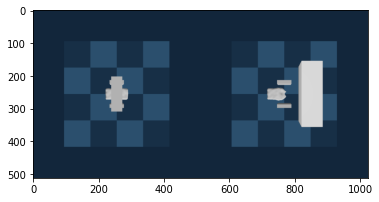

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


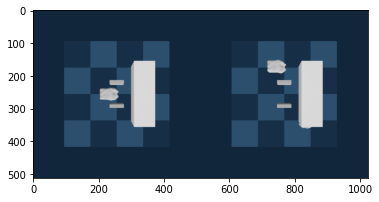

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


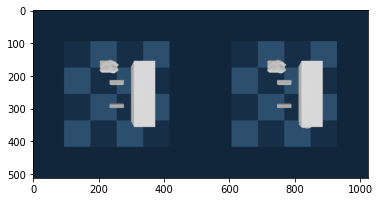

In [10]:
from plb.cut.sample_utils import generate
trajs = generate(env, state, dir=0.5, lift=0.0)

import numpy as np
import matplotlib.pyplot as plt

for a, b, _, _ in trajs:
    env.set_state(**a)
    img = env.render('rgb', img_size=512)
    env.set_state(**b)
    img2 = env.render('rgb', img_size=512)
    plt.imshow(np.concatenate((img, img2), 1))
    plt.show()


In [11]:
from plb.cut.solve_utils import place_manipulator
place_manipulator(env, trajs[1][0], 1, trajs[1][2], filename='xx.webm')

In [12]:
print(env.get_state()['state'][-2])

[0.5        0.30000001 0.5        1.         0.         0.
 0.        ]


In [13]:
!pwd

/home/hza/PlasticineLab/plb/cut


In [14]:
import torch
for idx, i in enumerate(trajs):
    torch.save(trajs[idx], f'task{idx}.pkl')

In [15]:
from plb.cut.solve_utils import solve_scene
print((trajs[1][2]>0).sum())
out = solve_scene(env, trajs[1][0], trajs[1][1], 1, trajs[1][2]>0, max_iter=50, place_mainpulator=False, place_filename='place.webm')

1659


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
from plb.cut.sample_utils import execute

In [ ]:
execute(env, out['initial_state'], out['best_action'], filename='xx.webm')

#